In [1]:
import numpy
import seaborn as sns
import pandas as pd
import matplotlib
from matplotlib import *
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
life_exp_data = pd.read_csv("data/africa-mflifeexpectancy.csv")
dp3_vacc_data = pd.read_csv("data/africa-dtpvaccine.csv")
ms_vacc_data = pd.read_csv("data/africa-measlesvaccine.csv")
lit_data = pd.read_csv("data/africa-literacy.csv")
corrupt_data = pd.read_csv("data/africa-corruption.csv")
food_energy_data = pd.read_csv("data/africa-dietenergy.csv")
conflict_data = pd.read_csv("data/africa-conflicthistory.csv")
sanit_data = pd.read_csv("data/africa-sanitation.csv")
econ_free_data = pd.read_csv("data/africa-economicfreedom.csv")

Average Life Expectancy 49


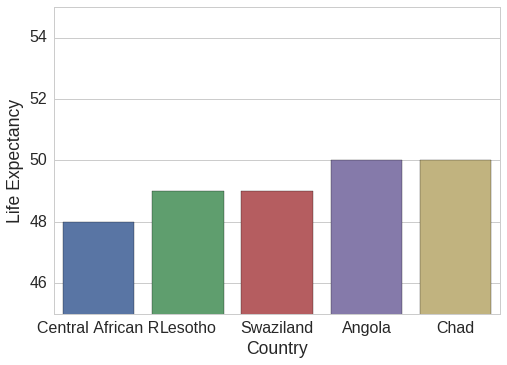

In [3]:
f_bool = (life_exp_data['Indicator']=='Life expectancy at birth female') & (life_exp_data['Year']==2014)
m_bool = (life_exp_data['Indicator']=='Life expectancy at birth male') & (life_exp_data['Year']==2014)
le_country = [unicode(i,"utf-8") for i in life_exp_data['Country'][m_bool]]
le_value = map(int,life_exp_data['Value'][m_bool])
le_zip = zip(le_value,le_country)
le_zip.sort()
low_zip_country = [i[1][:17] for i in le_zip[:5]]
low_zip_value = [i[0] for i in le_zip[:5]]
high_zip_country = [i[1][:17] for i in le_zip[-5:]]
high_zip_value = [i[0] for i in le_zip[-5:]]
sns.set(style = 'whitegrid',font_scale=1.6)
ax1 = sns.barplot(x=low_zip_country,y=low_zip_value)
ax1.set_ylim(45,55)
ax1.set_ylabel('Life Expectancy')
ax1.set_xlabel('Country')
print 'Average Life Expectancy',sum(low_zip_value)/len(low_zip_value)

Average Life Expectancy 71


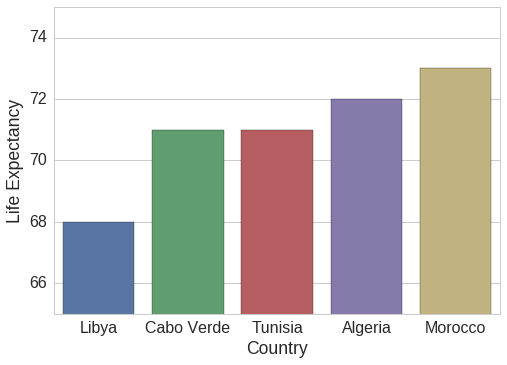

In [4]:
sns.set(style = 'whitegrid',font_scale=1.6)
ax2 = sns.barplot(x=high_zip_country,y=high_zip_value)
ax2.set_ylim(65,75)
ax2.set_ylabel('Life Expectancy')
ax2.set_xlabel('Country')
print 'Average Life Expectancy',sum(high_zip_value)/len(high_zip_value)

In [5]:
countries = ms_vacc_data['Country'].unique()

In [6]:
print 'LE',life_exp_data['Year'].unique(),'DP3',dp3_vacc_data['Year'].unique(),'Meas', ms_vacc_data['Year'].unique(), \
  'Lit',lit_data['Year'].unique(),'Corr',corrupt_data['Year'].unique(),'FE',food_energy_data['Year'].unique(), \
  'Conf',conflict_data['Year'].unique(),'San',sanit_data['Year'].unique(),'EF',econ_free_data['Year'].unique()

LE [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014] DP3 [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013] Meas [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014] Lit [1990 1991 1992 1993 1994 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013] Corr [1996 1998 2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014] FE [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016] Conf [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014] San [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015] EF [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 

In [7]:
years = corrupt_data['Year'].unique()

In [8]:
def norm_year_count(in_data,n_countries,n_years):
  in_data2 = pd.pivot_table(in_data,values='Value', index=['Country'],columns=['Year'])
  in_data2 = in_data2.reindex(n_countries)
  in_data2 = in_data2.transpose()
  in_data2 = in_data2.reindex(n_years)  
  in_data2 = in_data2.apply(pd.Series.interpolate)
  in_data2 = in_data2.transpose()
  return in_data2

In [9]:
life_exp_data2 = norm_year_count(life_exp_data,countries,years)
dp3_vacc_data2 = norm_year_count(dp3_vacc_data,countries,years)
ms_vacc_data2 = norm_year_count(ms_vacc_data,countries,years)
lit_data2 = norm_year_count(lit_data,countries,years)
corrupt_data2 = norm_year_count(corrupt_data,countries,years)
food_energy_data2 = norm_year_count(food_energy_data,countries,years)
conflict_data2 = norm_year_count(conflict_data,countries,years)
sanit_data2 = norm_year_count(sanit_data,countries,years)
econ_free_data2 = norm_year_count(econ_free_data,countries,years)

In [10]:
life_exp_data2.keys()

Int64Index([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64')

In [33]:
life_exp_2014 = life_exp_data2[2014]
life_exp_2014.name="life_expectancy"
dp3_vacc_2014 = dp3_vacc_data2[2014]
dp3_vacc_2014.name='dtp_vaccine'
ms_vacc_2014 = ms_vacc_data2[2014]
ms_vacc_2014.name='measles_vaccine'
lit_2014 = lit_data2[2014]
lit_2014.name='literacy'
corrupt_2014 = corrupt_data2[2014]
corrupt_2014.name='corruption'
food_energy_2014 = food_energy_data2[2014]
food_energy_2014.name='food_energy'
conflict_2014 = conflict_data2[2014]
conflict_2014.name='conflict'
sanit_2014 = sanit_data2[2014]
sanit_2014.name='sanitation'
econ_free_2014 = econ_free_data2[2014]
econ_free_2014.name='economic_freedom'

In [34]:
data_2014 = pd.concat([life_exp_2014,dp3_vacc_2014,ms_vacc_2014,lit_2014,corrupt_2014,food_energy_2014, 
                       conflict_2014,sanit_2014,econ_free_2014],axis=1)

In [35]:
print data_2014

                                  life_expectancy  dtp_vaccine  \
Country                                                          
Uganda                                     58.510           78   
Angola                                     52.300           93   
Lesotho                                    49.700           96   
Algeria                                    74.865           95   
Tanzania                                   64.980           91   
Egypt                                      71.175           97   
Gambia                                     60.265           97   
Libya                                      71.785           98   
Central African Republic                   50.705           23   
Rwanda                                     64.040           98   
Ghana                                      61.335           90   
Swaziland                                  48.915           98   
Comoros                                    63.295           83   
Tunisia   